<a href="https://colab.research.google.com/github/harishkevin/implementing_ANN_classifier/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 438 kB 62.0 MB/s 
     |████████████████████████████████| 5.8 MB 57.5 MB/s 
     |████████████████████████████████| 1.6 MB 48.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [4]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dividing the dataset into dependent and independent features

In [8]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Feature engineering

In [11]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [12]:
X = X.drop(['Geography', 'Gender'], axis=1)


In [13]:
X = pd.concat([X, geography, gender], axis=1)

Splitting the dataset into train and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Creating ANN

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [21]:
# initializing the ANN
classifier = Sequential()

In [23]:
# adding input layers
classifier.add(Dense(units=11, activation='relu'))

In [24]:
# adding  first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [25]:
# adding second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [26]:
# adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
#early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [31]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3067 - accuracy: 0.8705 - val_loss: 0.3619 - val_accuracy: 0.8542
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3059 - accuracy: 0.8720 - val_loss: 0.3642 - val_accuracy: 0.8519
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3062 - accuracy: 0.8709 - val_loss: 0.3614 - val_accuracy: 0.8527
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3053 - accuracy: 0.8711 - val_loss: 0.3632 - val_accuracy: 0.8535
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3061 - accuracy: 0.8707 - val_loss: 0.3608 - val_accuracy: 0.8538
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3058 - accuracy: 0.8684 - val_loss: 0.3692 - val_accuracy: 0.8531
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3064 - accuracy: 0.8726 - val_loss: 0.3623 - val_accuracy:

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

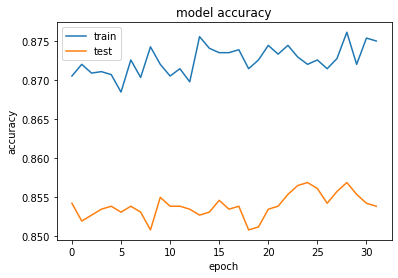

In [33]:
# accuracy summary
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

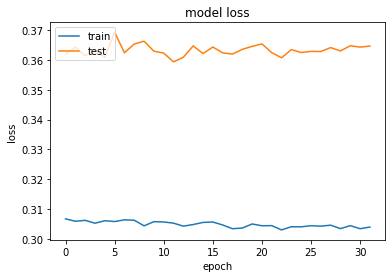

In [34]:
# loss summary
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# predict
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1496,   99],
       [ 196,  209]])

In [38]:
#accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8525